In [1]:
%matplotlib inline

In [2]:
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import wandb

In [8]:
X_LIM = (0, 200)
Y_LIM = (0, 200)
ERROR_BAR = 'se'
WANDB_ENTITY = 'odiamond18'

In [4]:
# Get data for my code
api = wandb.Api()
run_dfs = []
i = 0

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + '3ofu75uj')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['aux_1_util', 'aux_2_util', 'aux_3_util', 'aux_4_util', 'episode'])])
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

if len(run_dfs) != 30:
    print('warning total runs is not 30')

run_0
run_1
run_2
run_3
run_4
run_5
run_6
run_7
run_8
run_9
run_10
run_11
run_12
run_13
run_14
run_15
run_16
run_17
run_18
run_19
run_20
run_21
run_22
run_23
run_24
run_25
run_26
run_27
run_28
run_29


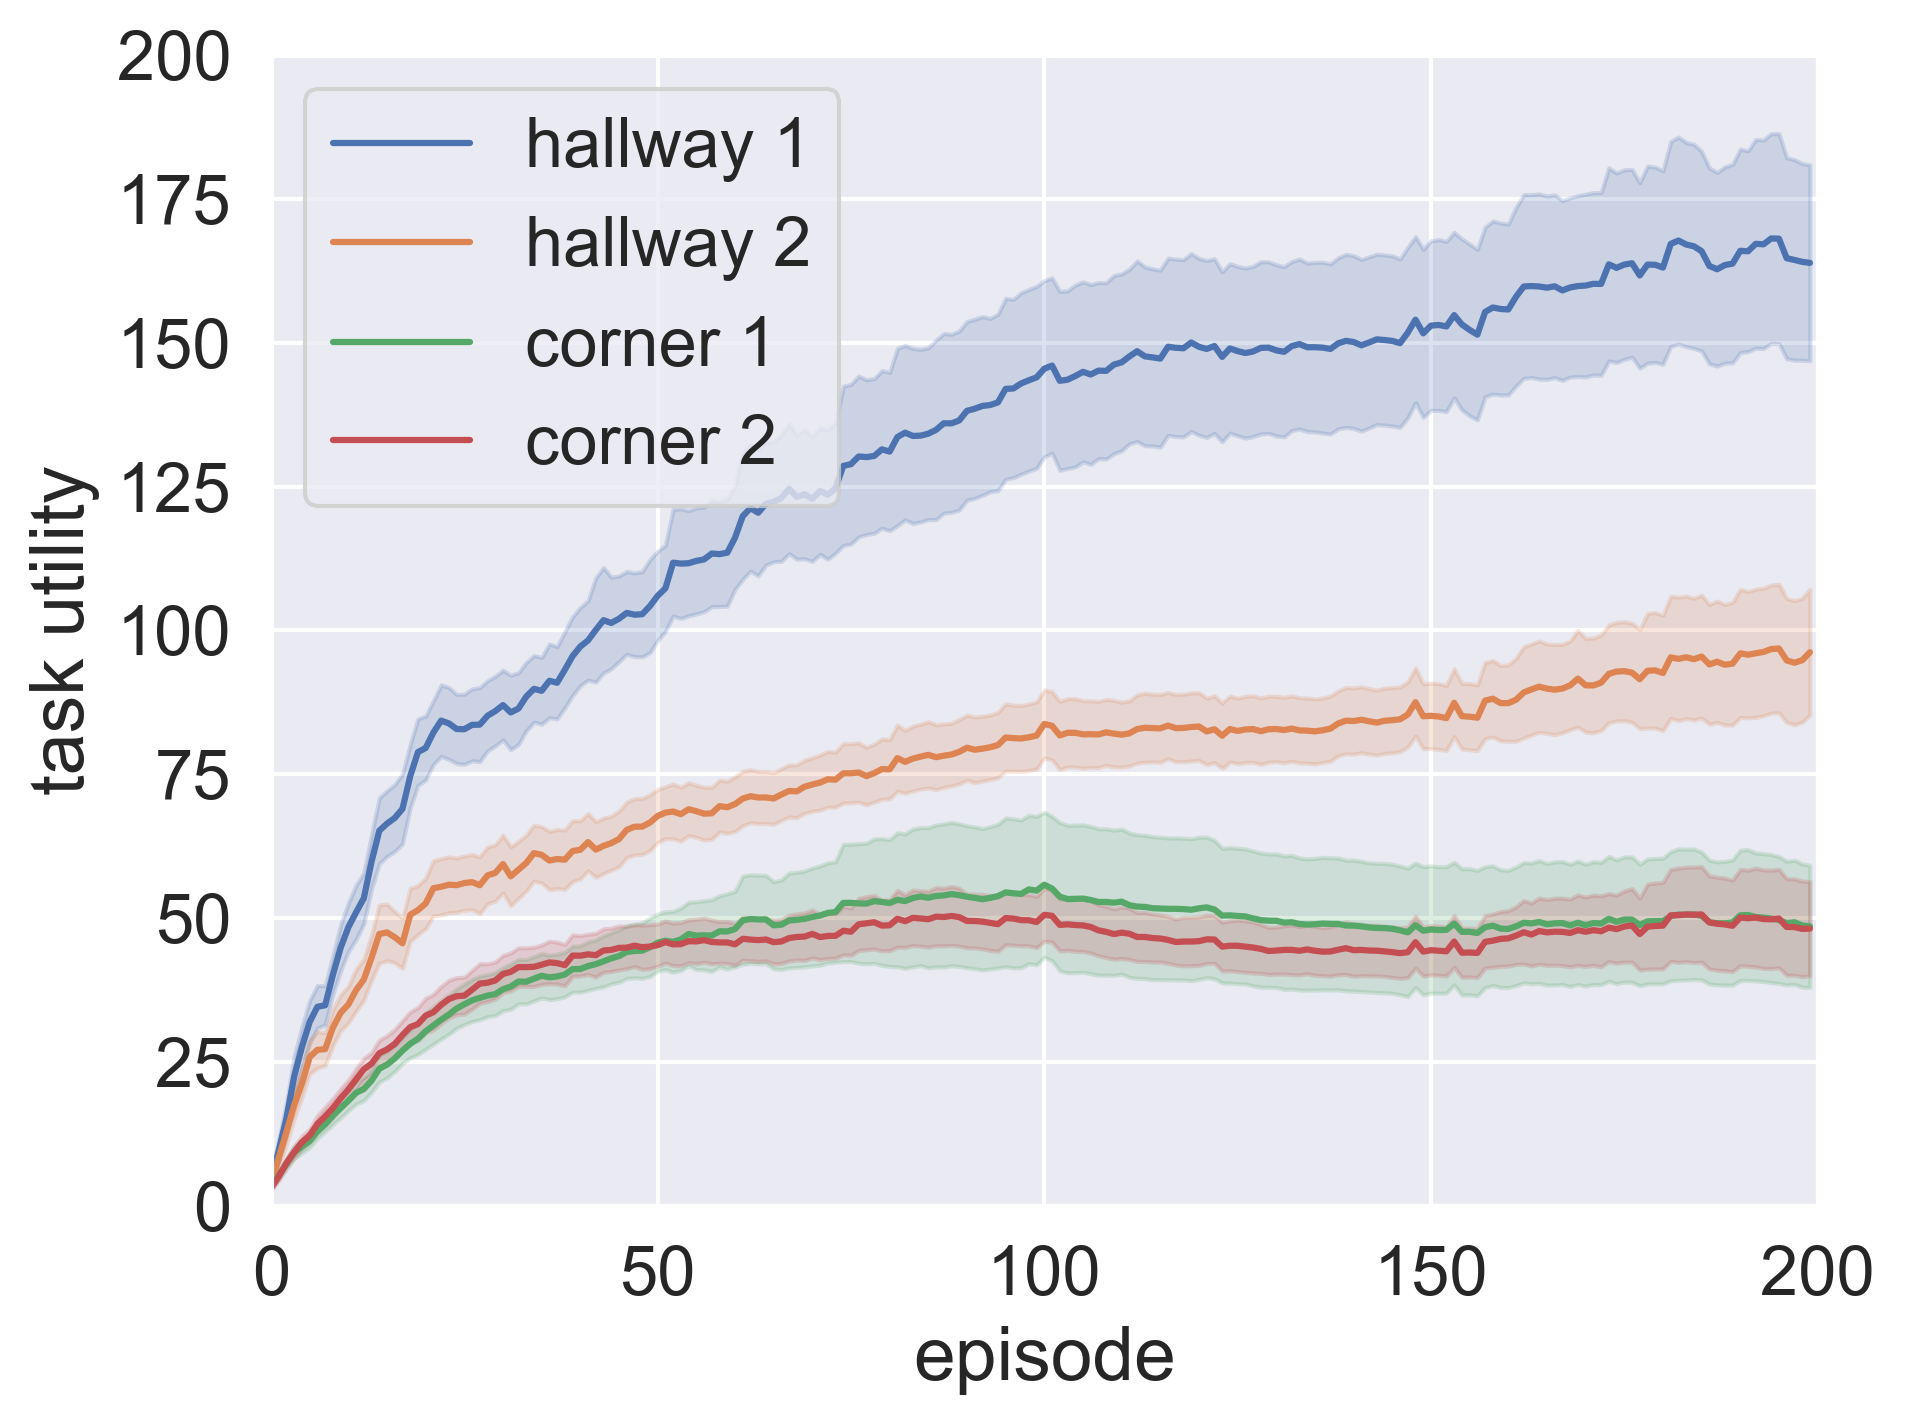

In [13]:
stacked_df = pd.concat(run_dfs, axis=0, ignore_index=True)
stacked_df = stacked_df.rename(columns={'aux_1_util': 'hallway 1', 'aux_2_util': 'hallway 2', 'aux_3_util': 'corner 1', 'aux_4_util': 'corner 2'})
stacked_df = pd.melt(stacked_df, id_vars=['episode'], var_name='variable', value_name='task utility')
# Plot learning curves for each level of the condition, averaging y values for each timestep across runs with the same level
sns.set_theme(style="darkgrid", font_scale=1.5, rc={"figure.dpi":300, 'savefig.dpi':300})
sns.lineplot(x='episode', y='task utility', hue='variable', data=stacked_df, errorbar=ERROR_BAR)
plt.xlim(*X_LIM)
plt.ylim(*Y_LIM)
plt.legend(loc='best').set_draggable(True)

plt.tight_layout(pad=0.5)
plt.show()